# CIFAR 10 Image Classification

![image](https://miro.medium.com/max/1400/1*OSvbuPLy0PSM2nZ62SbtlQ.png)

To build high performance self-driving system, one must first develop a successful machine learning pipeline to recognize objects. In this project, you will be using CIFAR 10 dataset. CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute (this project uses CIFAR-10). The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below: 

Class Index | Class label
--- | ---
`**0**` | **airplane**
`**1**` | **automobile**
`**2**` | **bird**
`**3**` | **cat**
`**4**` | **deer**
`**5**` | **dog**
`**6**` | **frog**
`**7**` | **horse**
`**8**` | **ship**
`**9**` | **truck**

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

- Algorithms: Deep Convolutional Neural Network, Deep Recurrent Neural Network

- Difficulty: Challenging. The dataset can be used directly. In addition, if teams have other demands, more complex data processing procedure can be developed to produce high accuracy

## Captone Project Link

Links to Capstone Project slides: [here](https://docs.google.com/presentation/d/1iEMLMUSAA-lEe4EzC0sCbiu405Bow7-4zGIj3SKN-1c/edit#slide=id.g107242abc6f_0_12)

## Motivation

Image classification using deep learning has become very popular, and seems to be one of the best methods. Images with more features (and higher resolution) require more sophisticated networks that are able to consider the translation invariance of features, and other important aspects of image classification.

This project was meant to give an insight and understanding of how convolutional neural networks work, different methods for improving a model (batch normalization, data augmentation etc.) and the evaluation of complex models.



## Load Data

In [ ]:
# example of loading the cifar10 dataset
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from keras.datasets import cifar10

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()



170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
label_dict = {0: "airplane",
              1: "automobile",
              2: "bird",
              3: "cat",
              4: "deer",
              5: "dog",
              6: "frog",
              7: "horse",
              8: "ship",
              9: "truck",}

## Define Research Question

In [ ]:
# split training, validation and test
random_index = np.random.permutation(trainX.shape[0])
train_proportion = .85
train_end_index = int(trainX.shape[0] * train_proportion)

training_X = trainX[random_index[:train_end_index]]
training_y = trainy[random_index[:train_end_index]]

validation_X = trainX[random_index[train_end_index:]]
validation_y = trainy[random_index[train_end_index:]]

print(training_X.shape, training_y.shape)
print(validation_X.shape, validation_y.shape)

from sklearn.model_selection import train_test_split
# train and validate
train_proportion = .90
training_X, validation_X, training_y, validation_y = train_test_split(trainX, trainy, train_size=train_proportion)
print(training_X.shape, training_y.shape)
print(validation_X.shape, validation_y.shape)

(42500, 32, 32, 3) (42500, 1)
(7500, 32, 32, 3) (7500, 1)
(45000, 32, 32, 3) (45000, 1)
(5000, 32, 32, 3) (5000, 1)


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

Examples:

- You can count the number of classes in this data. 
- You examine the images according to class labels. 
- You can plot the averages of pixel-level values across all images in a particular class. In addition, you can also span the visualization for all classes.

You can refer to more resources here in this [code](https://colab.research.google.com/drive/1KkG1V7RsnKjCRd0zx0h434nqiXwOf-fG?authuser=1).

In [ ]:
for i in range(10):
    print(label_dict[i], training_X[(training_y.flatten() == i), :, :].shape)

airplane (4496, 32, 32, 3)
automobile (4523, 32, 32, 3)
bird (4494, 32, 32, 3)
cat (4463, 32, 32, 3)
deer (4512, 32, 32, 3)
dog (4470, 32, 32, 3)
frog (4527, 32, 32, 3)
horse (4500, 32, 32, 3)
ship (4522, 32, 32, 3)
truck (4493, 32, 32, 3)


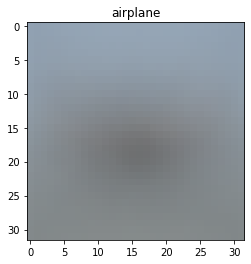

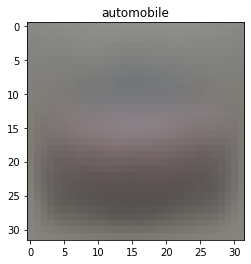

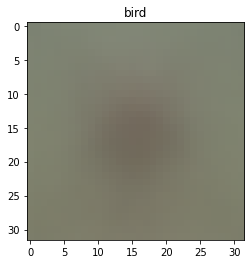

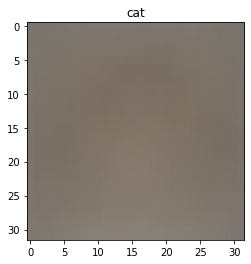

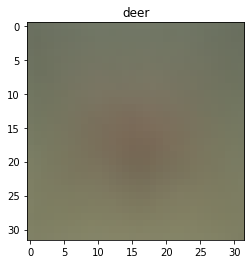

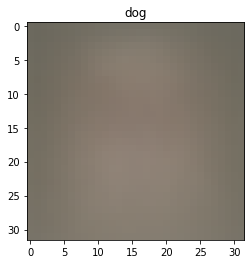

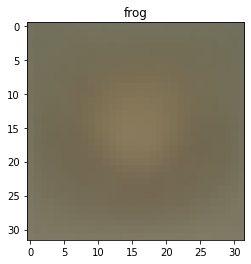

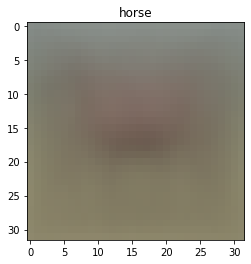

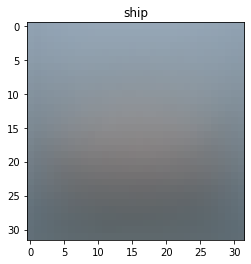

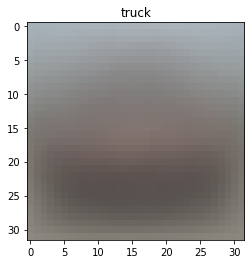

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(10):
    subset = training_X[training_y.flatten()==i]
    mean_img = np.mean(subset, axis=0)
    mean_img = mean_img / 255
    plt.imshow(mean_img)
    plt.title(label_dict[i])
    plt.show()

In [ ]:
for i in range(10):
    print(label_dict[i], training_X[(training_y.flatten() == i), :, :].shape)

airplane (4496, 32, 32, 3)
automobile (4523, 32, 32, 3)
bird (4494, 32, 32, 3)
cat (4463, 32, 32, 3)
deer (4512, 32, 32, 3)
dog (4470, 32, 32, 3)
frog (4527, 32, 32, 3)
horse (4500, 32, 32, 3)
ship (4522, 32, 32, 3)
truck (4493, 32, 32, 3)


(32, 32, 3)
3278.1900284930957
5220.418108257147
0.0
1942.228079764051
0.0
1.0


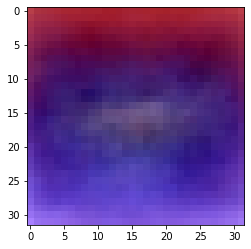

(32, 32, 3)
3170.4941330890874
7345.302510092984
0.0
4174.8083770038975
0.0
1.0


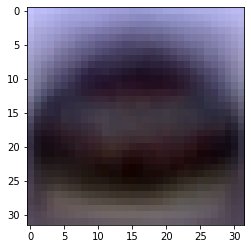

(32, 32, 3)
2542.477597336423
5185.683462635938
0.0
2643.2058652995147
0.0
1.0


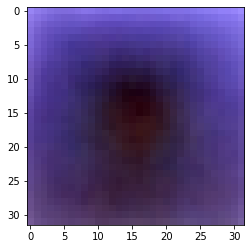

(32, 32, 3)
3313.482934772417
5917.3686606568845
0.0
2603.8857258844673
0.0
1.0


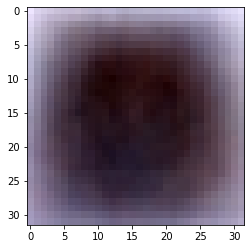

(32, 32, 3)
2178.5837600912923
4477.0780267101
0.0
2298.4942666188076
0.0
1.0


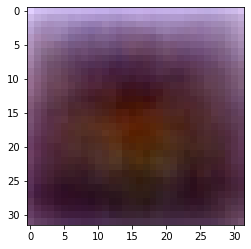

(32, 32, 3)
3331.944593136459
4907.609139778479
0.0
1575.6645466420205
0.0
1.0


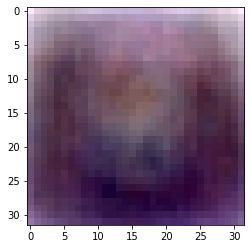

(32, 32, 3)
1809.7581908104667
4802.270948444766
0.0
2992.5127576342993
0.0
1.0


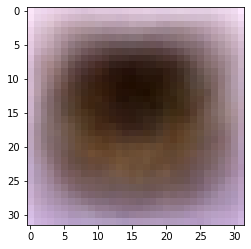

(32, 32, 3)
2639.69576711111
6945.506064395126
0.0
4305.810297284015
0.0
1.0


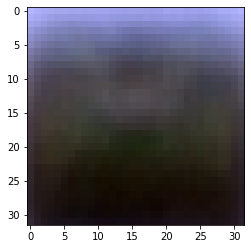

(32, 32, 3)
2830.456053416964
4481.495006475761
0.0
1651.0389530587972
0.0
1.0


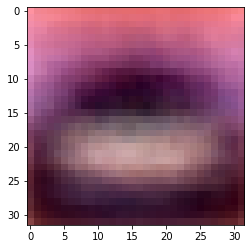

(32, 32, 3)
2734.4233573713536
6096.333036790048
0.0
3361.9096794186944
0.0
1.0


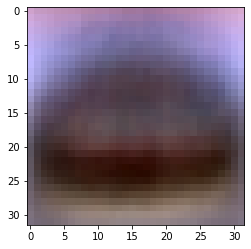

In [ ]:
for i in range(10):
    subset = training_X[training_y.flatten()==i]
    std_img = np.var(subset, axis=0)
    print(std_img.shape)
    print(std_img.min())
    print(std_img.max())

    std_img = std_img - std_img.min()
    print(std_img.min())
    print(std_img.max())

    std_img = std_img / std_img.max()
    print(std_img.min())
    print(std_img.max())

    plt.imshow(std_img)
    plt.show()

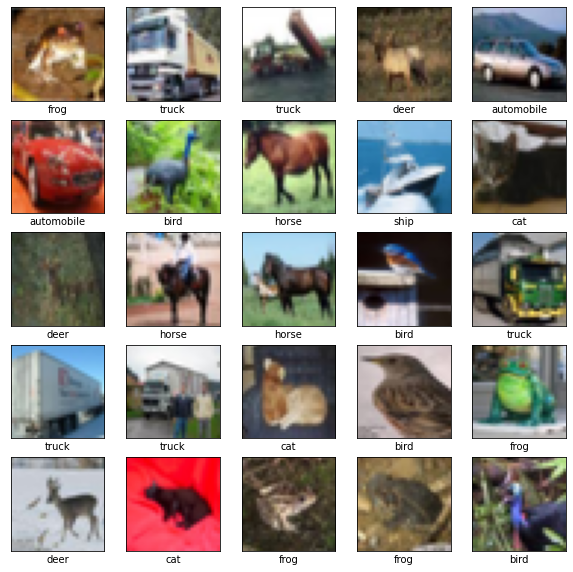

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(label_dict[trainy[i][0]])
plt.show()

In [ ]:
# include examples for each class
# include scaled variance plots from carlos
# include mean plots 

## Baseline Model

Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementations are widely available in popular packages.

# To do:

1) Separate training and testing sets

2) Create a traditional neural network model for classification. Code examples are [here](https://colab.research.google.com/drive/1OGxD35fQxXdWNDwYGYpZcES5zgo6UvdO?authuser=1) for reference.

3) Plot your training and testing accuracy across epochs


## Challenge:

- Create another neural net with a different layer configuration. Does it improve performance?

In [ ]:
n = len(training_X)
print(training_X.shape)
print(training_X.reshape((n, -1)).shape)

print(training_y.shape)

(45000, 32, 32, 3)
(45000, 3072)
(45000, 1)


In [ ]:
import sklearn
import sklearn.linear_model
from sklearn.metrics import classification_report # tested with 0.21.2l


model = sklearn.linear_model.LogisticRegression(random_state=0)

model.fit(
    training_X.reshape((len(training_X), -1)), 
    training_y.flatten()
          )

test_predictions = model.predict(
    testX.reshape((len(testX), -1))
    )
train_predictions = model.predict(
    training_X.reshape((len(training_X), -1))
    )

# print(classification_report(train_predictions, training_y.flatten()))
# print(classification_report(test_predictions, testy.flatten()))
# sklearn.metrics.confusion_matrix(y_true=testy, y_pred=predictions)
print('train acc', np.mean(train_predictions==training_y.flatten()))
print('test acc', np.mean(test_predictions==testy.flatten()))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


train acc 0.4288888888888889
test acc 0.4033


In [ ]:
print('train acc', np.mean(train_predictions==training_y.flatten()))
print('test acc', np.mean(test_predictions==testy.flatten()))


train acc 0.4288888888888889
test acc 0.4033


In [ ]:
training_X = training_X / 255
validation_X = validation_X / 255
testX = testX / 255 


Epoch 1/10
1407/1407 [==============================] - 8s 4ms/step - loss: 1.9125 - accuracy: 0.3136 - val_loss: 1.8507 - val_accuracy: 0.3352
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7644 - accuracy: 0.3700 - val_loss: 1.7441 - val_accuracy: 0.3826
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7029 - accuracy: 0.3948 - val_loss: 1.6829 - val_accuracy: 0.4008
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6660 - accuracy: 0.4086 - val_loss: 1.7242 - val_accuracy: 0.3926
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6437 - accuracy: 0.4134 - val_loss: 1.6799 - val_accuracy: 0.3832
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6288 - accuracy: 0.4204 - val_loss: 1.6601 - val_accuracy: 0.4122
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6126 - accuracy: 0.4259 - val_loss: 1.6459 - val_accuracy:

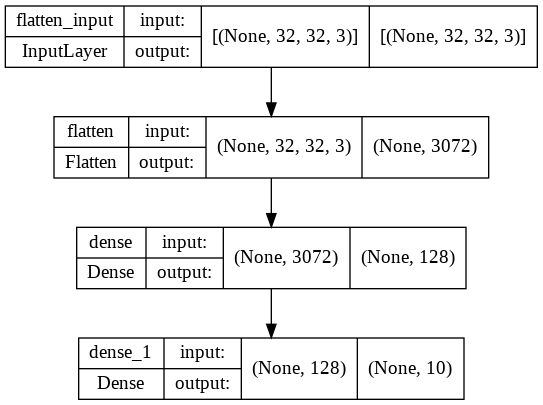

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(), # this function converts image from (28, 28) to 1D array 28^2 = 784
     tf.keras.layers.Dense(128, activation=tf.nn.relu), # 128 is a choice # ReLU(x) = max(x, 0)
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ]) 
model.compile(optimizer = "adam", # recall: gradient descent, stochastic gradient descent, RmsProp, ADAM
              loss = 'sparse_categorical_crossentropy', # loss: mean_square_error, mean_absolute_error, cross_entropy, binary_cross_entropy
              metrics=['accuracy'])

history = model.fit(training_X, training_y, epochs=10,
                    validation_data=[validation_X, validation_y])

print(model.summary())
tf.keras.utils.plot_model(model, to_file='simple_nn_model.png', show_shapes=True, show_layer_names=True)


(0.0, 1.928715354204178)

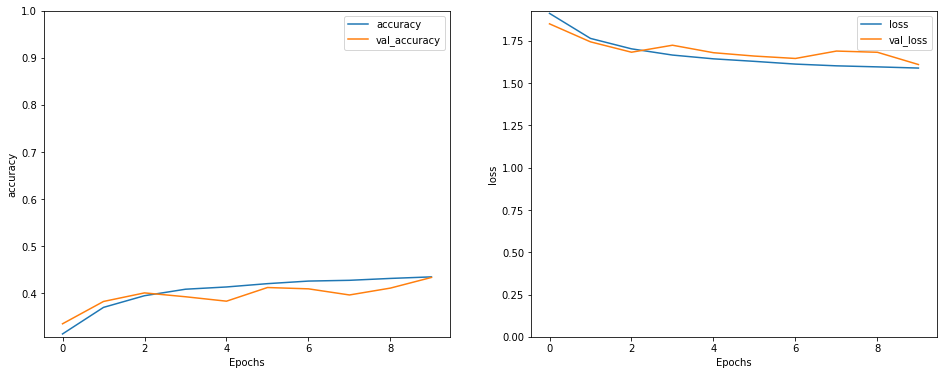

In [ ]:
# define plot_graphs function
# do not edit
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)  

In [ ]:
from sklearn.metrics import classification_report # tested with 0.21.2l

test_predictions = model.predict(testX).argmax(axis=1)
train_predictions = model.predict(training_X).argmax(axis=1)

print(classification_report(train_predictions, training_y.flatten()))
print(classification_report(test_predictions, testy.flatten()))
# sklearn.metrics.confusion_matrix(y_true=testy, y_pred=predictions)
# print('test acc', np.mean(testy.flatten()==predictions))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48      4115
           1       0.50      0.62      0.55      3645
           2       0.23      0.33      0.27      3158
           3       0.27      0.30      0.29      4037
           4       0.34      0.40      0.37      3775
           5       0.32      0.40      0.35      3561
           6       0.65      0.37      0.47      7919
           7       0.49      0.56      0.52      3891
           8       0.70      0.52      0.60      6064
           9       0.53      0.49      0.51      4835

    accuracy                           0.45     45000
   macro avg       0.45      0.45      0.44     45000
weighted avg       0.48      0.45      0.46     45000

              precision    recall  f1-score   support

           0       0.45      0.49      0.47       913
           1       0.46      0.59      0.52       770
           2       0.20      0.29      0.24       716
           3       0.24 

## Advanced Model

With the knowledge from the baseline model, your team and the instructor can work together to develop advanced models. Advanced models can have the following impact:

- higher accuracy (we usually refer to test set performance and advanced models should have higher performance in the test set than baseline models)
- auto-tune (some advanced model can be due to more automatic tuning procedure, this means the advanced model is a function instead of a fixed model)

Examples: 
- Build a model that is more complex or can improve upon your predictions for classification.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

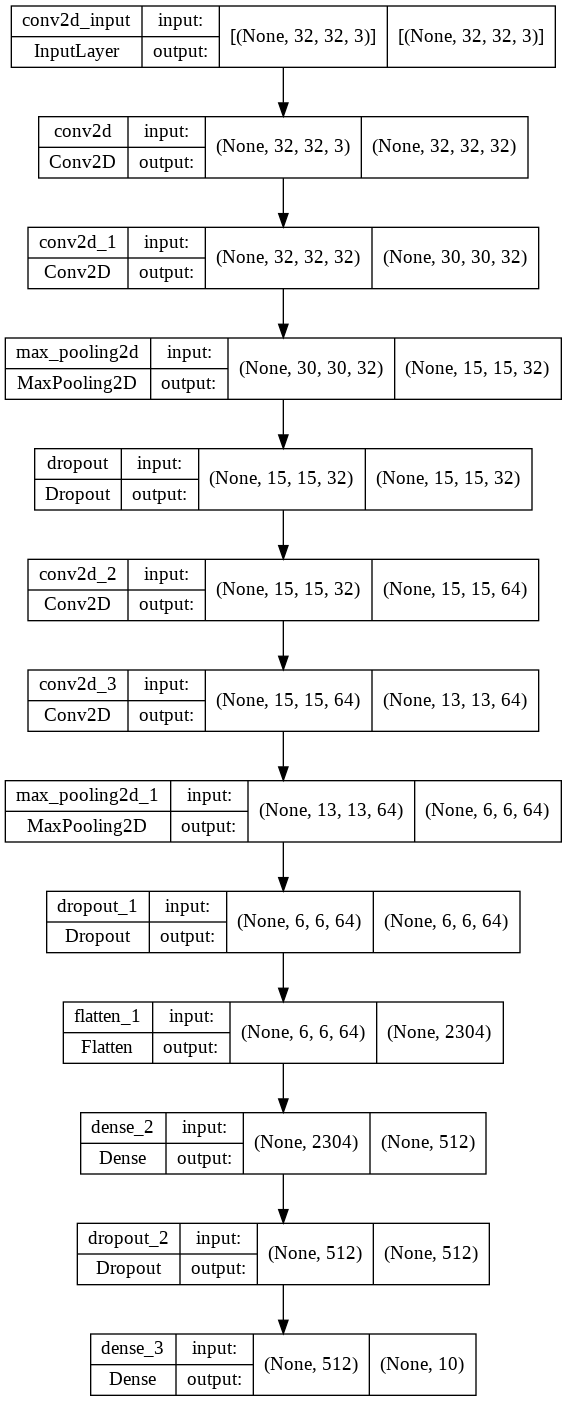

In [ ]:
from keras.backend import learning_phase
import tensorflow as tf


input_shape = training_X.shape[1:] # (32, 32, 3)
class_num = 10

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', input_shape=input_shape, activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(class_num, activation='softmax'),
])

# Build the model
cnn_model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), # optimizer function
    metrics=['accuracy'] # reporting metric
)

# Display a summary of the models structure
print(cnn_model.summary())
tf.keras.utils.plot_model(cnn_model, to_file='complex_nn_model.png', show_shapes=True, show_layer_names=True)


In [ ]:
history = cnn_model.fit(training_X, training_y, epochs=20, batch_size=32,
                    validation_data=[validation_X, validation_y])



Epoch 1/20
1407/1407 [==============================] - 34s 18ms/step - loss: 1.5629 - accuracy: 0.4288 - val_loss: 1.2013 - val_accuracy: 0.5744
Epoch 2/20
1407/1407 [==============================] - 21s 15ms/step - loss: 1.2095 - accuracy: 0.5691 - val_loss: 1.0164 - val_accuracy: 0.6402
Epoch 3/20
1407/1407 [==============================] - 21s 15ms/step - loss: 1.0586 - accuracy: 0.6255 - val_loss: 0.9554 - val_accuracy: 0.6660
Epoch 4/20
1407/1407 [==============================] - 21s 15ms/step - loss: 0.9669 - accuracy: 0.6604 - val_loss: 0.8598 - val_accuracy: 0.6988
Epoch 5/20
1407/1407 [==============================] - 20s 15ms/step - loss: 0.9044 - accuracy: 0.6820 - val_loss: 0.8256 - val_accuracy: 0.7104
Epoch 6/20
1407/1407 [==============================] - 20s 14ms/step - loss: 0.8546 - accuracy: 0.6993 - val_loss: 0.8099 - val_accuracy: 0.7196
Epoch 7/20
1407/1407 [==============================] - 21s 15ms/step - loss: 0.8157 - accuracy: 0.7132 - val_loss: 0.7385 -

(0.0, 1.611537292599678)

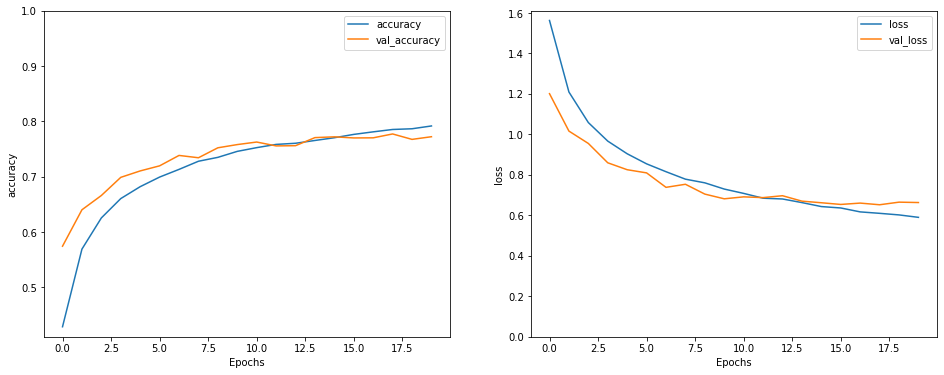

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)  

In [ ]:
test_predictions = cnn_model.predict(testX).argmax(axis=1)
train_predictions = cnn_model.predict(training_X).argmax(axis=1)

print(classification_report(train_predictions, training_y.flatten()))
print(classification_report(test_predictions, testy.flatten()))


              precision    recall  f1-score   support

           0       0.92      0.95      0.93      4346
           1       0.98      0.95      0.97      4685
           2       0.87      0.89      0.88      4396
           3       0.74      0.84      0.79      3930
           4       0.91      0.86      0.89      4794
           5       0.81      0.84      0.83      4282
           6       0.96      0.85      0.90      5087
           7       0.93      0.95      0.94      4422
           8       0.96      0.95      0.95      4592
           9       0.95      0.96      0.96      4466

    accuracy                           0.90     45000
   macro avg       0.90      0.90      0.90     45000
weighted avg       0.91      0.90      0.91     45000

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       950
           1       0.93      0.84      0.89      1108
           2       0.68      0.70      0.69       973
           3       0.54 